In [2]:
%pip install pandas

     -------------------------------------- 11.6/11.6 MB 314.6 kB/s eta 0:00:00
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib

     ---------------------------------------- 8.0/8.0 MB 318.0 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 336.9 kB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached fonttools-4.53.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
     -------------------------------------- 187.5/187.5 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install seaborn

     ------------------------------------ 294.9/294.9 kB 867.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
%pip install Wordcloud

     -------------------------------------- 300.0/300.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from wordcloud import WordCloud 

In [7]:
train_df = pd.read_csv('train.csv',delimiter=',', encoding='ISO-8859-1')
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [9]:
test_df = pd.read_csv('test.csv',delimiter=',', encoding='ISO-8859-1')
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [10]:
train_df.shape
test_df.shape

(4815, 9)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [12]:
train_df.drop(['textID', 'Time of Tweet', 'selected_text', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], axis=1, inplace=True)
train_df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column
train_df['sentiment'] = label_encoder.fit_transform(train_df['sentiment'])

# Print the DataFrame with encoded 'sentiment' column
print("\nDataFrame with Encoded 'sentiment' Column:")
train_df.head()


DataFrame with Encoded 'sentiment' Column:


,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0


0 negative ; 1 netral ; 2 positif

<Axes: xlabel='sentiment', ylabel='Count'>

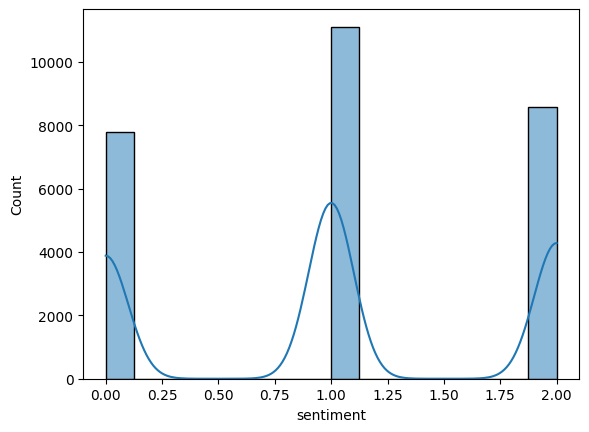

In [16]:
sns.histplot(train_df['sentiment'], kde=True)

<Axes: xlabel='sentiment', ylabel='count'>

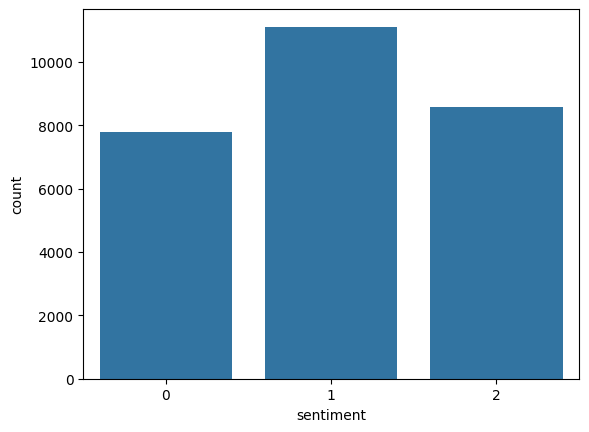

In [17]:
sns.countplot(x= train_df['sentiment'])

In [19]:
# Convert the 'text' column to string, replacing NaNs with empty strings
train_df['text'] = train_df['text'].fillna('').astype(str)

# Initialize SnowballStemmer and a list of words to be removed
lem = SnowballStemmer("english")
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)

# Process the text data
final_corpus = []
final_corpus_joined = []
for i in train_df.index:
    text = re.sub('[^a-zA-Z]', ' ', train_df['text'][i])
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = text.split()
    text = [lem.stem(word) for word in text if word not in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)


# def preprocessing(text):
#   word_list= word_tokenize(text.lower()) #tokenize the text lower
#   word_list= [word for word in word_list if word not in stop_words] #remove stopwords
#   word_list= [word for word in word_list if word not in punct_list] #remove punctuation
#   word_list= [word for word in word_list if word.isalpha()] #alphanumerical
#   word_list= [stemmer.stem(word) for word in word_list ] #stemming
#   word_list =[lemmatizer.lemmatize(word) for word in word_list] #lemmatizing

#   return{word: True for word in word_list}

In [21]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = train_df["sentiment"].values

In [22]:
data_cleaned

,text,sentiment
0,respond go,1
1,sooo sad miss san diego,0
2,boss bulli,0
3,interview leav alon,0
4,son put releas alreadi bought,0
...,...,...
27476,wish could come see u denver husband lost job ...,0
27477,wonder rake client made clear net forc dev lea...,0
27478,yay good enjoy break probabl need hectic weeke...,2
27479,worth,2


# wordcloud

In [23]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = train_df['sentiment'].values
data_eda.head()

,text,sentiment
0,"[respond, go]",1
1,"[sooo, sad, miss, san, diego]",0
2,"[boss, bulli]",0
3,"[interview, leav, alon]",0
4,"[son, put, releas, alreadi, bought]",0


In [24]:
positive = data_eda[data_eda['sentiment'] == 2]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()
neutral = data_eda[data_eda['sentiment'] == 1]
neutral_list = neutral['text'].tolist()

In [25]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])
neutral_all = " ".join([word for sent in neutral_list for word in sent ])

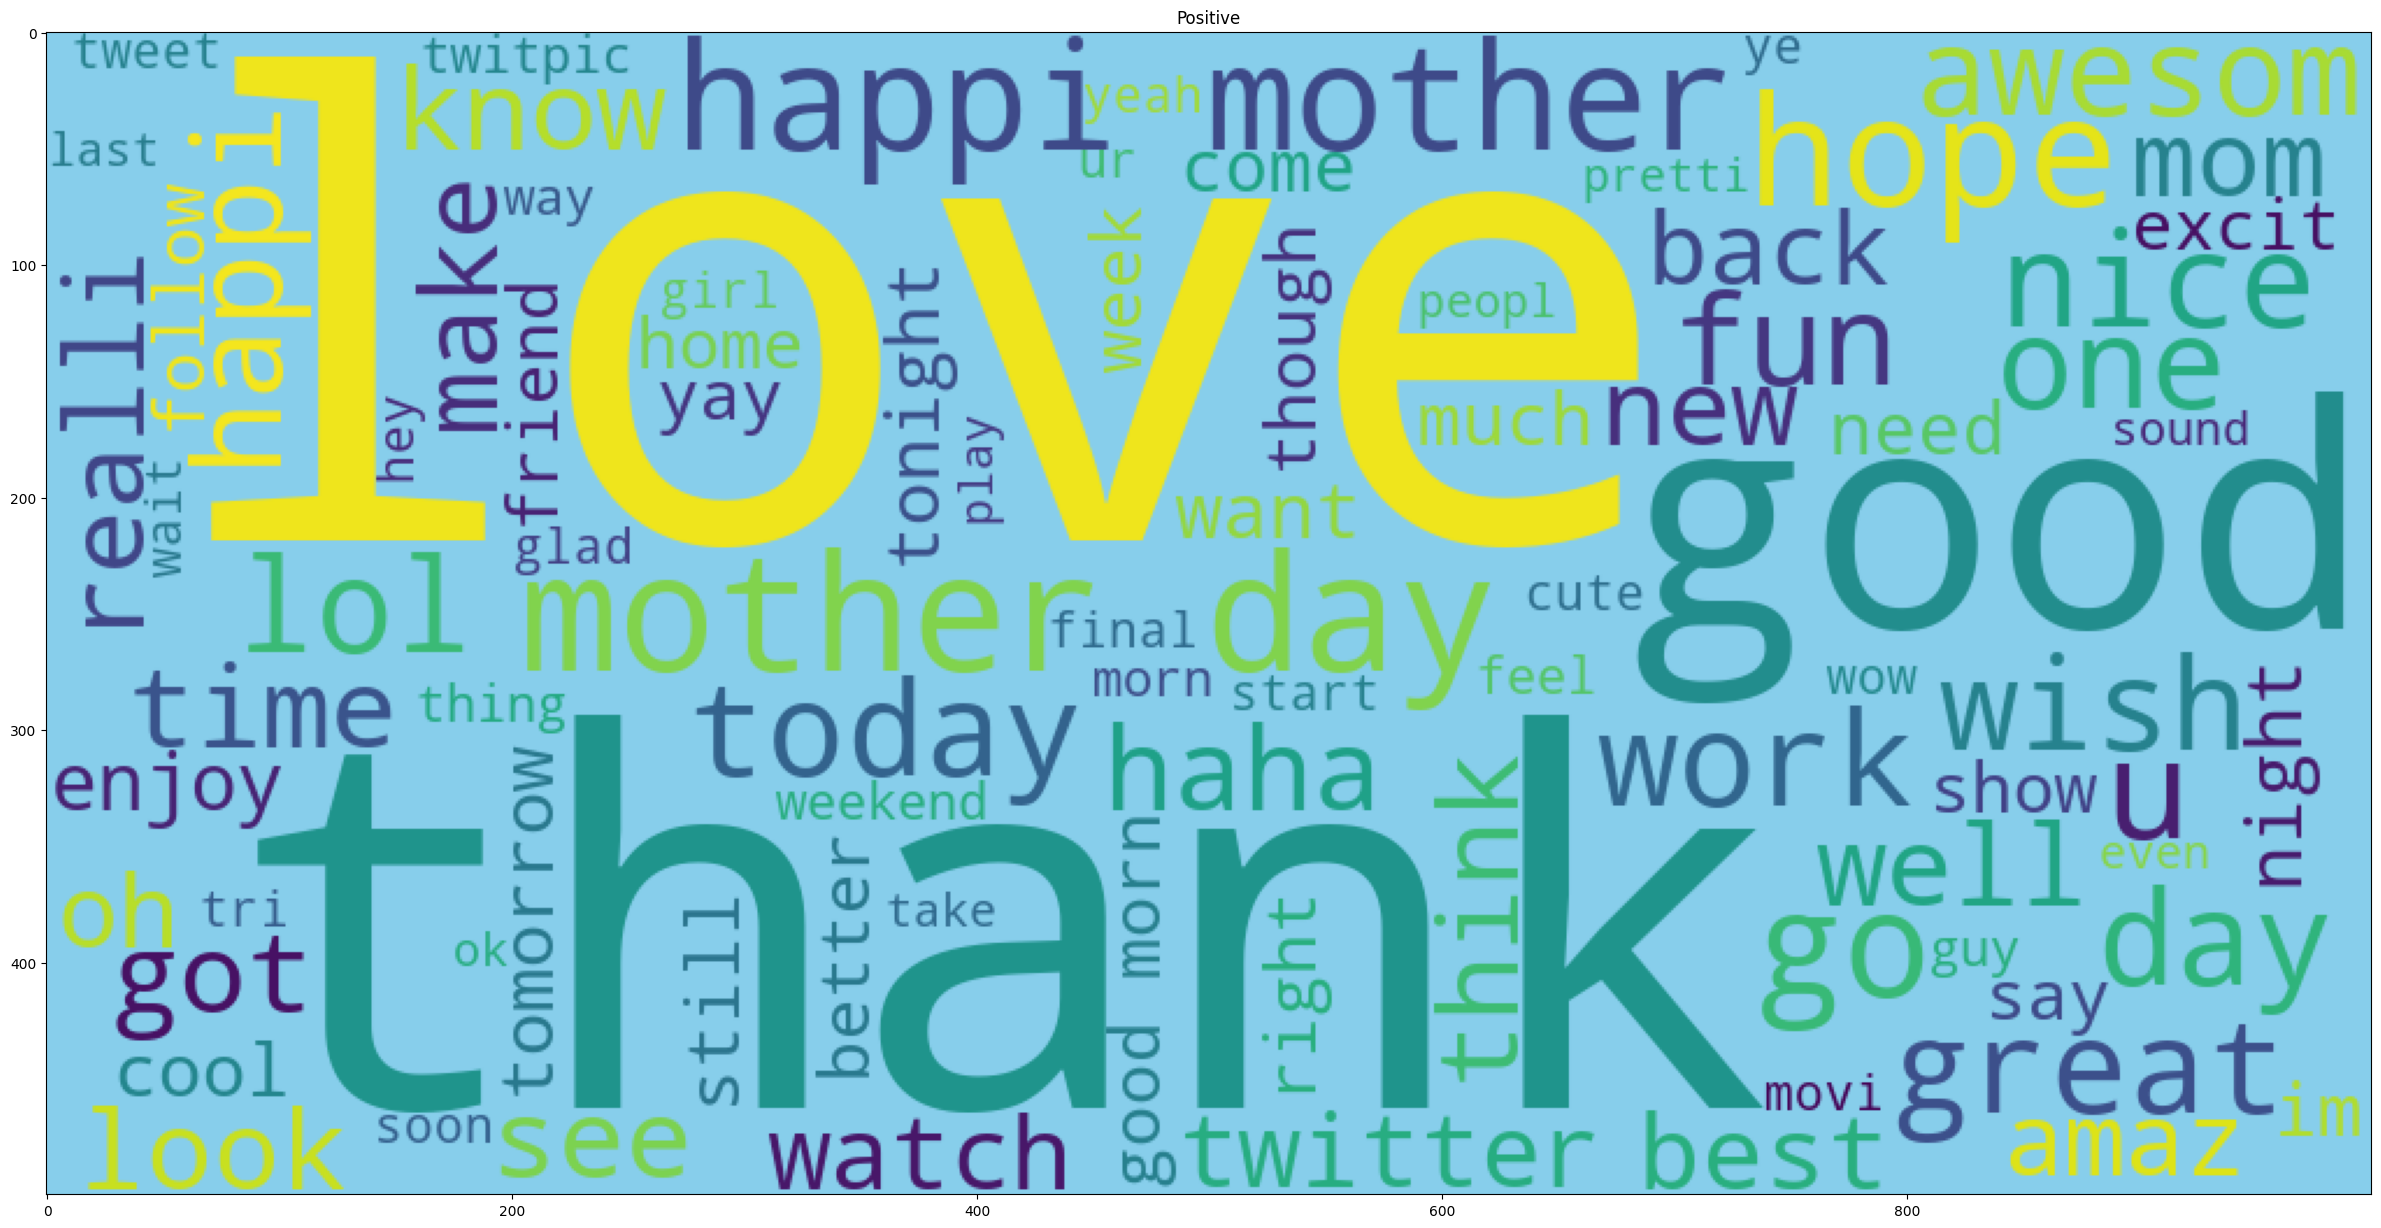

In [32]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

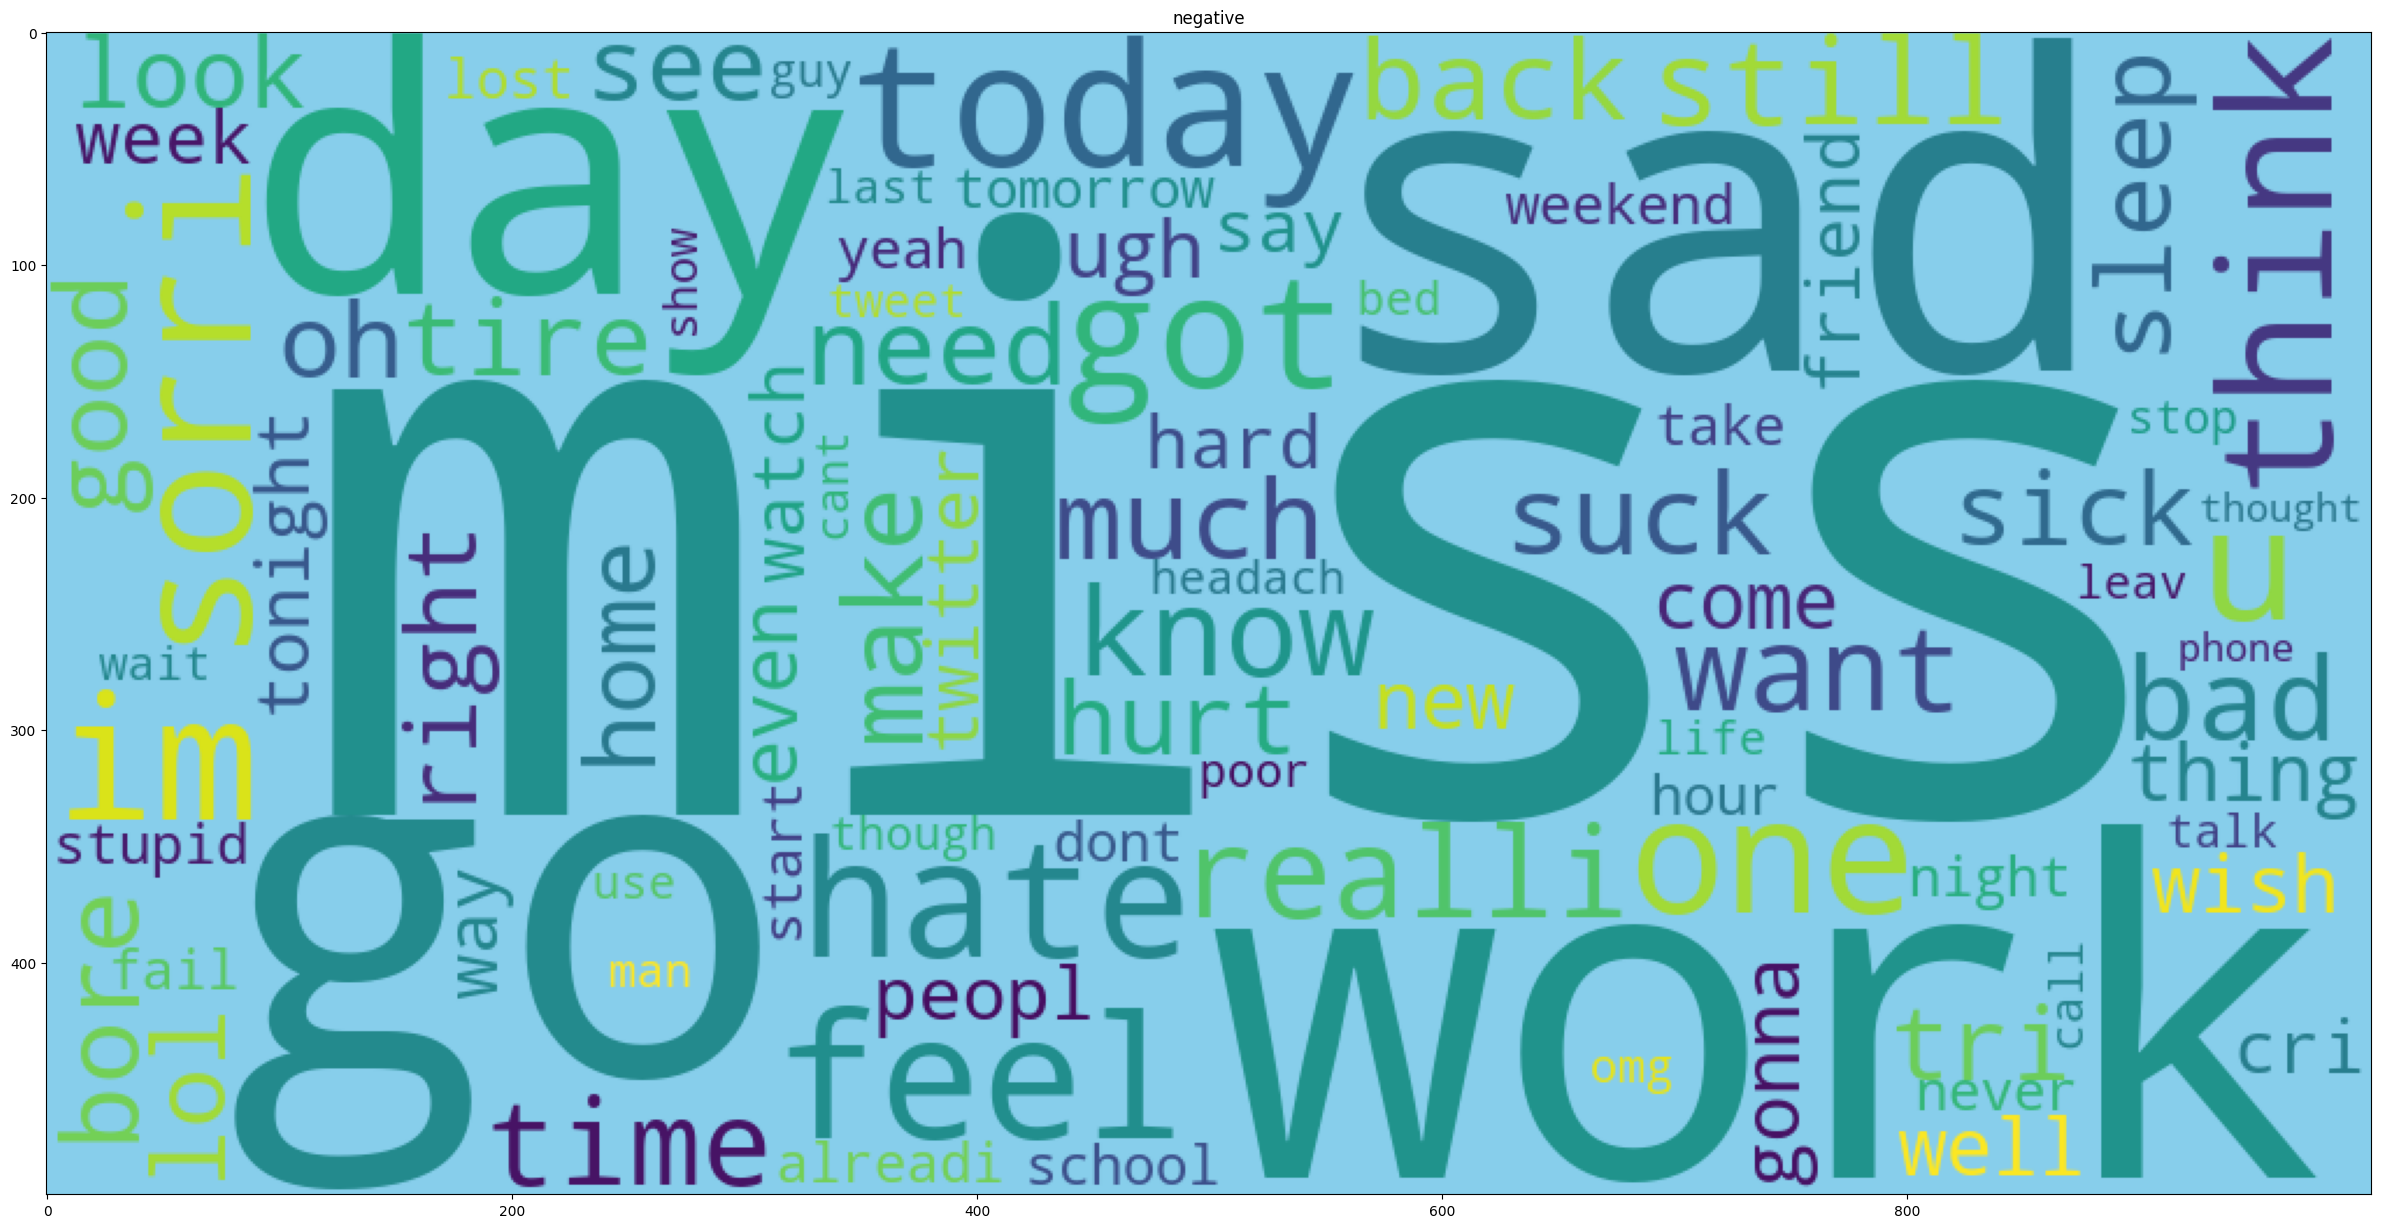

In [33]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

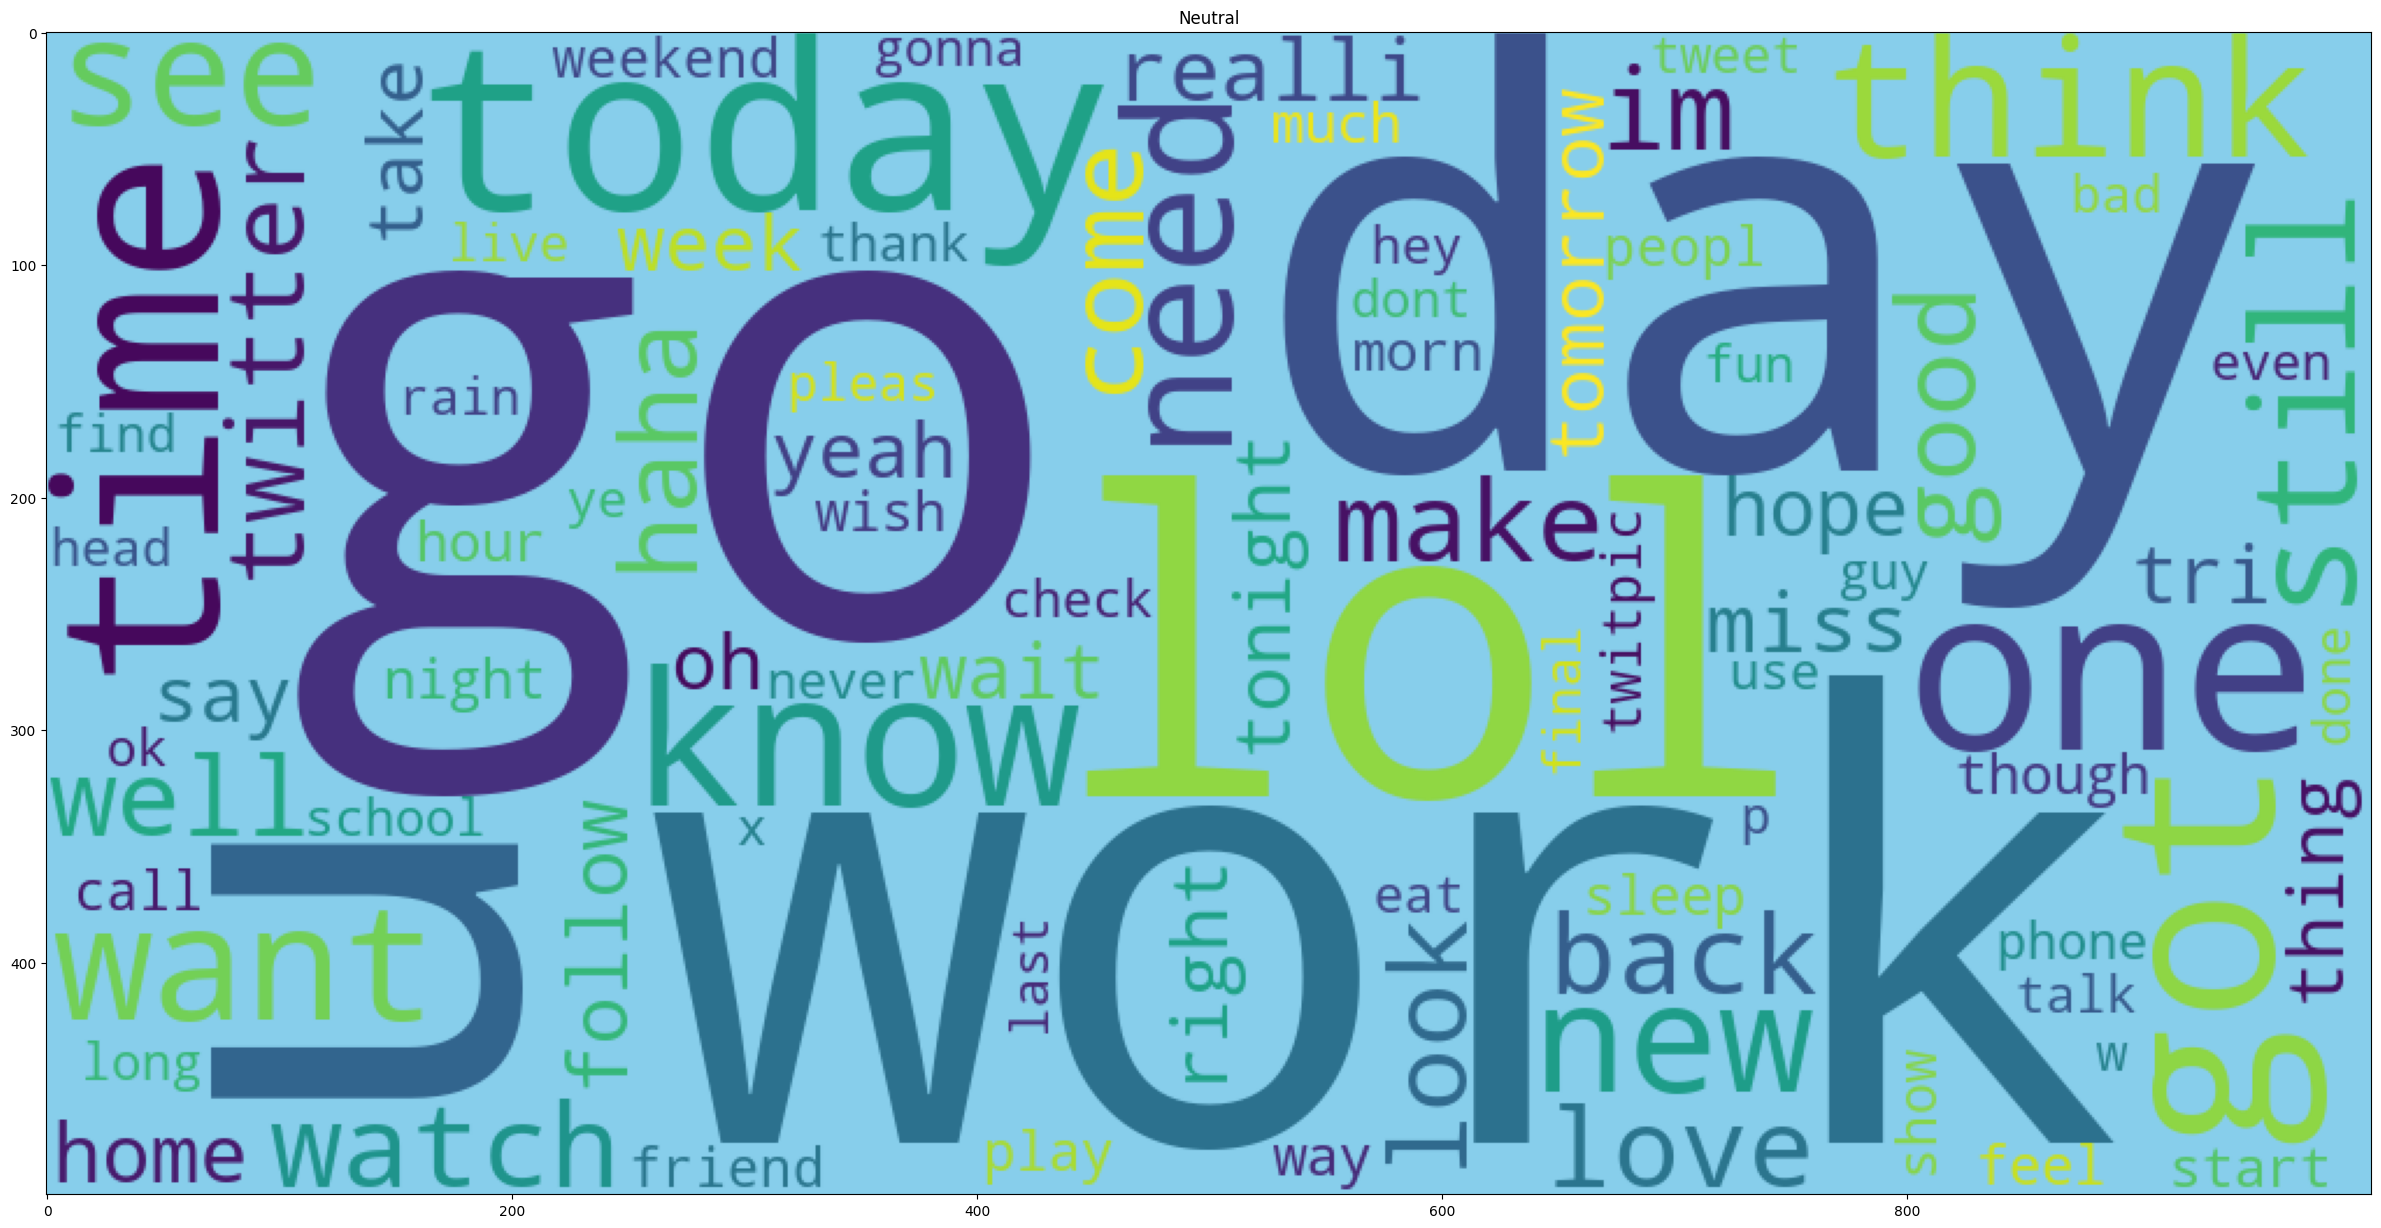

In [34]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(neutral_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Neutral")
plt.show()

# model building

In [36]:
X = data_cleaned['text']
y = data_cleaned['sentiment']

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [ ]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train, y_train)
# Prediction
test_pred = model1.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, test_pred) * 100)

Accuracy:  69.65617609605239


In [60]:
y_pred = model.predict(X_test)
print(y_pred)


[1 1 1 ... 0 2 2]


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.58      0.66      1562
           1       0.63      0.78      0.69      2230
           2       0.77      0.70      0.73      1705

    accuracy                           0.70      5497
   macro avg       0.72      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



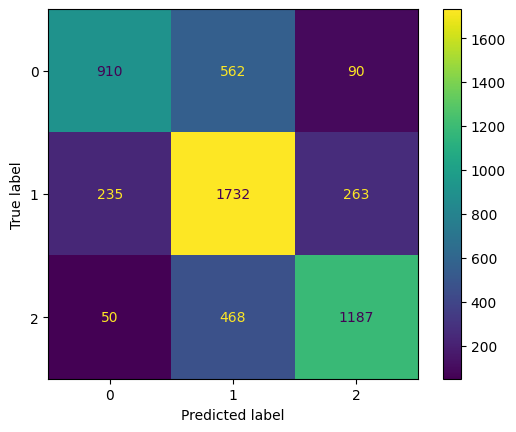

In [44]:
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, test_pred))
t1.plot()

# save model

In [63]:
import pickle

In [64]:
with open('model_logreg.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from the file
with open('model_logreg.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [65]:
accuracy = loaded_model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(X_test)



Accuracy: 69.40%
  (0, 9988)	0.5185989851768045
  (0, 11774)	0.5038606238149507
  (0, 18918)	0.5393715388225411
  (0, 13010)	0.35507612000784733
  (0, 3337)	0.24531379180709417
  (1, 14013)	0.5590551422660344
  (1, 18330)	0.5547912407294129
  (1, 18683)	0.542441574052173
  (1, 4052)	0.29226899571392045
  (2, 12380)	0.5429530166054953
  (2, 17084)	0.39389191341492785
  (2, 12790)	0.3238513090311353
  (2, 285)	0.3381987004847767
  (2, 3622)	0.35886649550012656
  (2, 13116)	0.31995056637643327
  (2, 4052)	0.17947884274172818
  (2, 17296)	0.2596670356928185
  (3, 15343)	0.5723699729400374
  (3, 7774)	0.5753089040190241
  (3, 16659)	0.4707380332744333
  (3, 9225)	0.346147342994235
  (4, 1586)	0.3935989992006358
  (4, 255)	0.3935989992006358
  (4, 6640)	0.7085000708896104
  (4, 4907)	0.23505249065649741
  :	:
  (5493, 18683)	0.27315769527146166
  (5493, 12610)	0.36946397179320606
  (5493, 2694)	0.26099153919384027
  (5493, 15054)	0.22504305062873683
  (5493, 12055)	0.18174916595374604
  (549

In [66]:
def preprocessing(text):
   text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
   text = text.lower()
   text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
   text=re.sub("(\\d|\\W)+"," ",text)
   text = text.split()
   lem = SnowballStemmer("english")
   text = [lem.stem(word) for word in text if not word in stuff_to_be_removed] 
   text1 = " ".join(text)
   final_corpus.append(text)
   final_corpus_joined.append(text1)
   return(final_corpus_joined)


print(text1)


flirt go atg smile yay hug
